In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import datetime
import matplotlib.ticker as ticker

In [2]:
USERNAME ='OOIAPI-2VGT2I58H9V44G'
TOKEN= 'HFYV49OQEJ6'

In [3]:
ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()

def ntp_seconds_to_datetime(ntp_seconds):
    return datetime.fromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0).strftime("%I:%M:%S")

In [4]:
API_Request = ['https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE02SHSP/SP001/08-CTDPFJ000/recovered_cspp/ctdpf_j_cspp_instrument_recovered?beginDT=2017-08-26T19:54:46.000Z&endDT=2017-08-27T19:54:46.000Z&limit=1000',
              'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE02SHSP/SP001/08-CTDPFJ000/recovered_cspp/ctdpf_j_cspp_instrument_recovered?beginDT=2017-10-07T19:54:46.000Z&endDT=2017-10-08T19:54:46.000Z&limit=1000',
              'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE04OSPS/SF01B/2A-CTDPFA107/streamed/ctdpf_sbe43_sample?beginDT=2016-07-05T19:54:41.760Z&endDT=2016-07-06T19:54:41.760Z&limit=1000',
              'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE04OSPS/SF01B/2A-CTDPFA107/streamed/ctdpf_sbe43_sample?beginDT=2015-12-09T19:54:41.760Z&endDT=2015-12-10T19:54:41.760Z&limit=1000',
              'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE04OSPD/DP01B/01-CTDPFL105/recovered_wfp/dpc_ctd_instrument_recovered?beginDT=2014-08-22T00:04:46.928Z&endDT=2014-08-23T00:04:46.928Z&limit=1000',
              'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE04OSPD/DP01B/01-CTDPFL105/recovered_wfp/dpc_ctd_instrument_recovered?beginDT=2015-10-29T00:04:46.928Z&endDT=2015-10-30T00:04:46.928Z&limit=1000',
              'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/RS01SBPS/SF01A/2A-CTDPFA102/streamed/ctdpf_sbe43_sample?beginDT=2016-07-05T18:41:52.175Z&endDT=2016-07-06T18:41:52.175Z&limit=1000',
              'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE02SHSP/SP001/08-CTDPFJ000/recovered_cspp/ctdpf_j_cspp_instrument_recovered?beginDT=2019-07-25T19:54:46.373Z&endDT=2019-07-26T19:54:46.373Z&limit=1000',
              'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/RS01SBPD/DP01A/01-CTDPFL104/recovered_inst/dpc_ctd_instrument_recovered?beginDT=2019-07-19T17:42:10.582Z&endDT=2019-07-20T17:42:10.582Z&limit=1000',
              'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/RS01SBPD/DP01A/01-CTDPFL104/recovered_wfp/dpc_ctd_instrument_recovered?beginDT=2015-10-10T00:07:00.379Z&endDT=2015-10-11T00:07:00.379Z&limit=1000',
              'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/RS03AXPS/SF03A/2A-CTDPFA302/streamed/ctdpf_sbe43_sample?beginDT=2019-07-21T00:00:50.955Z&endDT=2019-07-22T00:00:50.955Z&limit=1000',
              'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/RS03AXPS/SF03A/2A-CTDPFA302/streamed/ctdpf_sbe43_sample?beginDT=2019-12-21T00:00:50.955Z&endDT=2019-12-22T00:00:50.955Z&limit=1000',
              'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/RS03AXPD/DP03A/01-CTDPFL304/recovered_inst/dpc_ctd_instrument_recovered?beginDT=2019-07-21T19:32:36.920Z&endDT=2019-07-22T19:32:36.920Z&limit=1000',
              'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/RS03AXPD/DP03A/01-CTDPFL304/recovered_inst/dpc_ctd_instrument_recovered?beginDT=2019-12-21T19:32:36.920Z&endDT=2019-12-22T19:32:36.920Z&limit=1000']

In [5]:
Title_time = ['time','time','time','time','time','time','time','time','time','time','time','time','time','time']

In [21]:
Title_temperature = ['temperature','temperature','seawater_temperature','seawater_temperature','temp','temp','seawater_temperature','temperature','temp','temp','seawater_temperature','seawater_temperature','temp','temp']

In [22]:
Title_pressure = ['pressure','pressure','seawater_pressure','seawater_pressure','pressure','pressure','seawater_pressure','pressure','pressure','pressure','seawater_pressure','seawater_pressure','pressure','pressure']

In [23]:
Title_salinity = ['salinity','salinity','practical_salinity','practical_salinity','practical_salinity','practical_salinity','practical_salinity','salinity','practical_salinity','practical_salinity','practical_salinity','practical_salinity','practical_salinity','practical_salinity']

In [24]:
SSP_Title = ['Coastal Endurance Oregon Shelf Surface Piercing Profiler Mooring SSP in Summer',
              'Coastal Endurance Oregon Shelf Surface Piercing Profiler Mooring SSP in Winter',
              'Coastal Endurance Oregon Offshore Cabled Shallow Profiler Mooring SSP in Summer',
              'Coastal Endurance Oregon Offshore Cabled Shallow Profiler Mooring SSP in Winter',
              'Coastal Endurance Oregon Offshore Cabled Deep Profiler Mooring SSP in Summer',
              'Coastal Endurance Oregon Offshore Cabled Deep Profiler Mooring SSP in Winter',
              'Cabled Array Oregon Slope Base Shallow Profiler SSP in Summer',
              'Cabled Array Oregon Slope Base Shallow Profiler SSP in Winter',
              'Cabled Array Oregon Slope Base Deep Profiler SSP in Summer',
              'Cabled Array Oregon Slope Base Deep Profiler SSP in Winter',
              'Cabled Array Axial Base Shallow Profiler SSP in Summer',
              'Cabled Array Axial Base Shallow Profiler SSP in Winter',
              'Cabled Array Axial Base Deep Profiler SSP in Summer',
              'Cabled Array Axial Base Deep Profiler SSP in Winter']

In [25]:
Depth_Title = ['Coastal Endurance Oregon Shelf Surface Piercing Profiler Mooring Depth over Time in Summer',
              'Coastal Endurance Oregon Shelf Surface Piercing Profiler Mooring Depth over Time in Winter',
              'Coastal Endurance Oregon Offshore Cabled Shallow Profiler Mooring Depth over Time in Summer',
              'Coastal Endurance Oregon Offshore Cabled Shallow Profiler Mooring Depth over Time in Winter',
              'Coastal Endurance Oregon Offshore Cabled Deep Profiler Mooring Depth over Time in Summer',
              'Coastal Endurance Oregon Offshore Cabled Deep Profiler Mooring in Winter',
              'Cabled Array Oregon Slope Base Shallow Profiler Depth over Time in Summer',
              'Cabled Array Oregon Slope Base Shallow Profiler Depth over Time in Winter',
              'Cabled Array Oregon Slope Base Deep Profiler Depth over Time in Summer',
              'Cabled Array Oregon Slope Base Deep Profiler Depth over Time in Winter',
              'Cabled Array Axial Base Shallow Profiler Depth over Time in Summer',
              'Cabled Array Axial Base Shallow Profiler Depth over Time in Winter',
              'Cabled Array Axial Base Deep Profiler Depth over Time in Summer',
              'Cabled Array Axial Base Deep Profiler Depth over Time in Winter']

In [26]:
from datetime import datetime

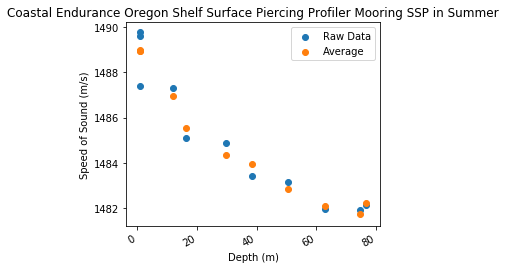

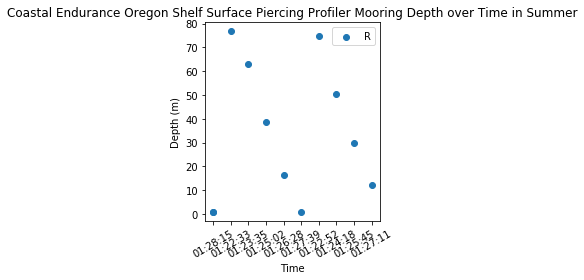

C:\Users\neilt\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RankWarning: Polyfit may be poorly conditioned
  app.launch_new_instance()


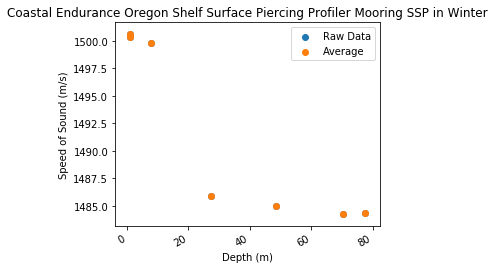

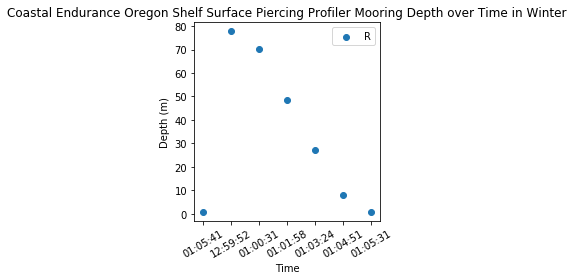

C:\Users\neilt\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RankWarning: Polyfit may be poorly conditioned
  app.launch_new_instance()


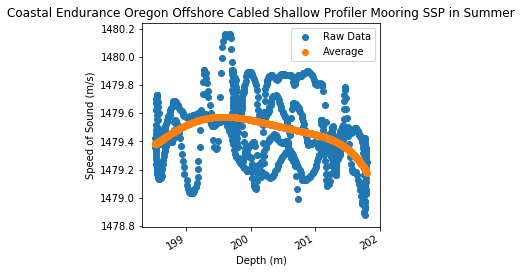

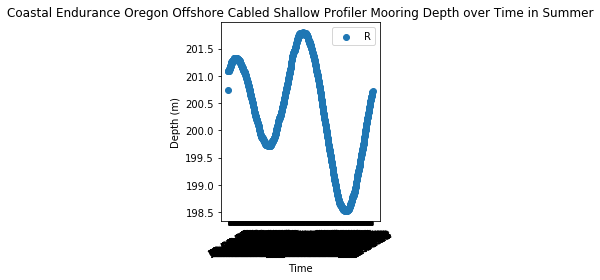

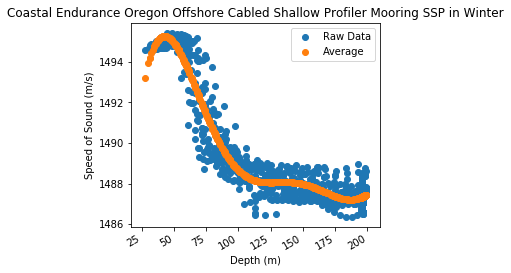

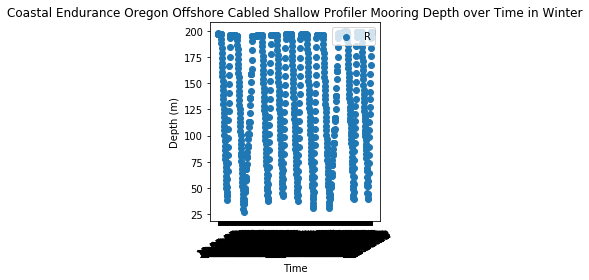

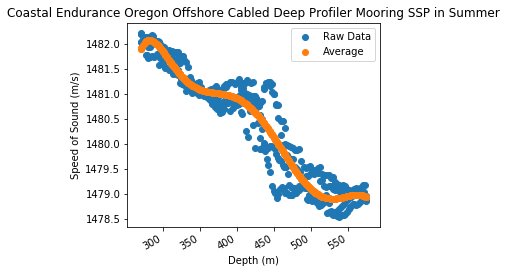

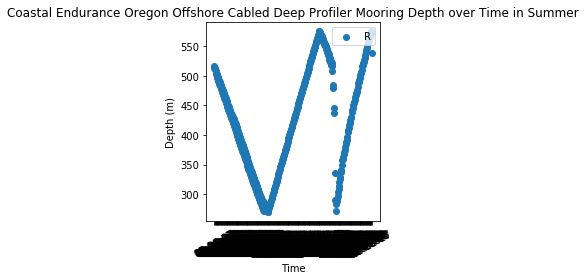

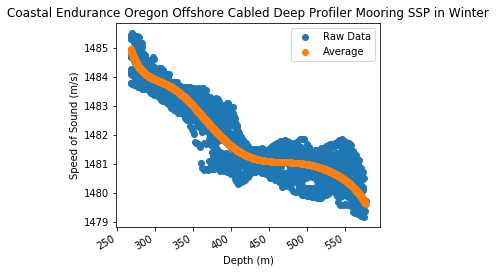

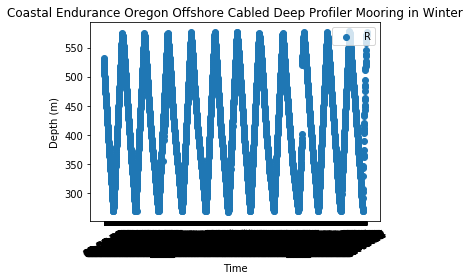

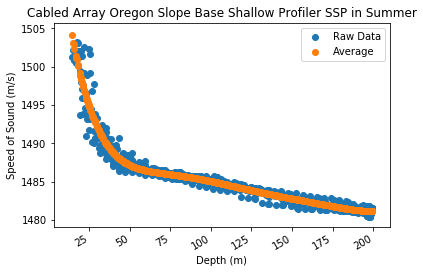

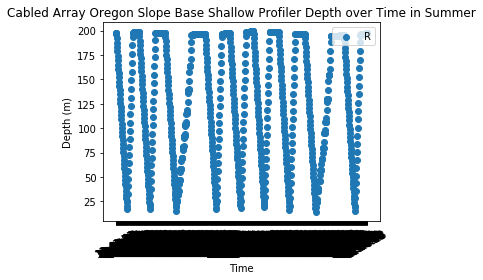

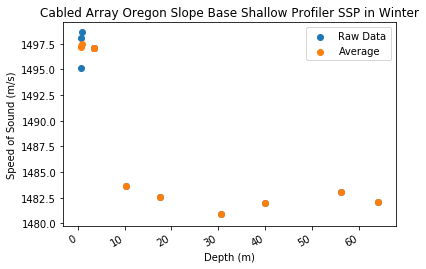

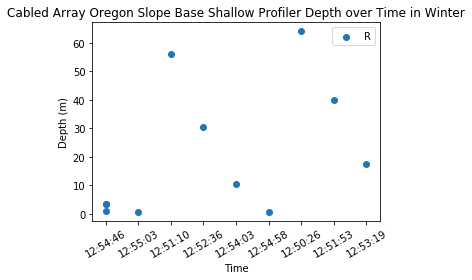

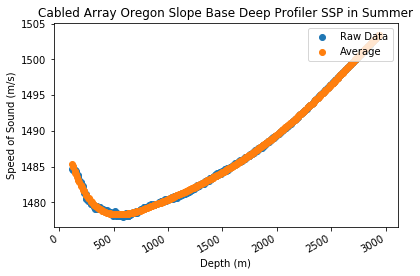

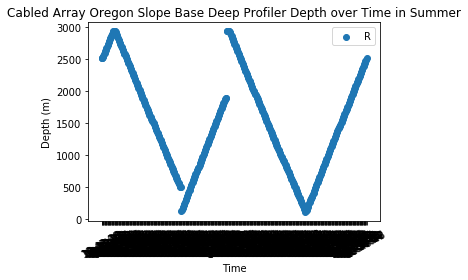

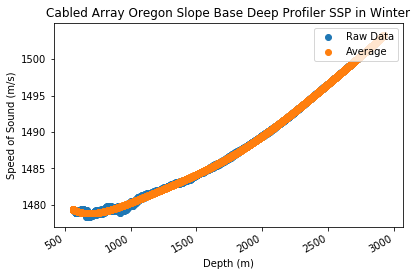

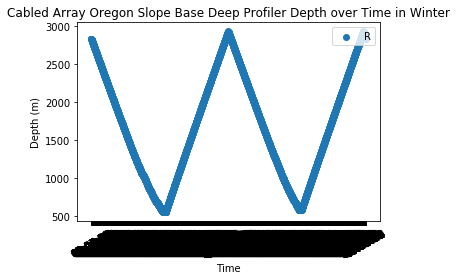

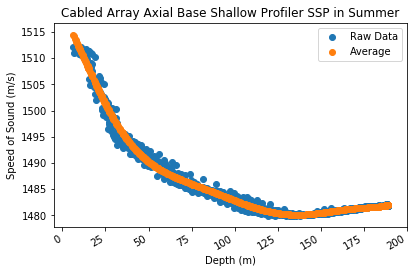

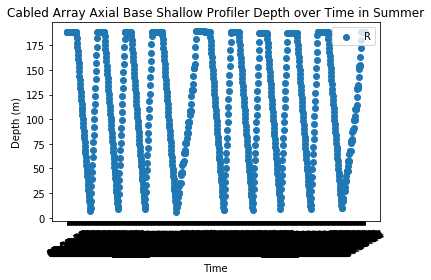

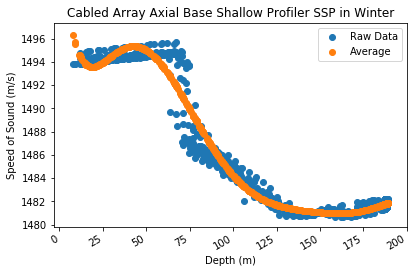

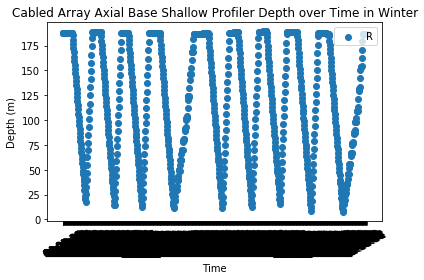

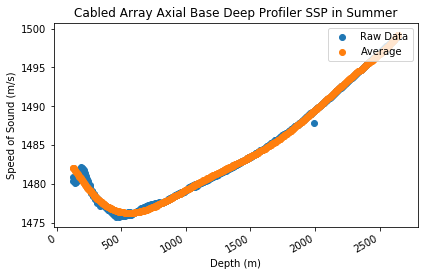

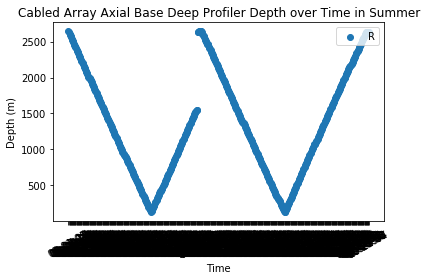

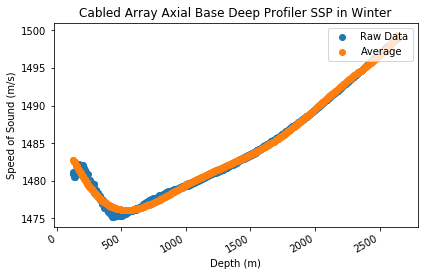

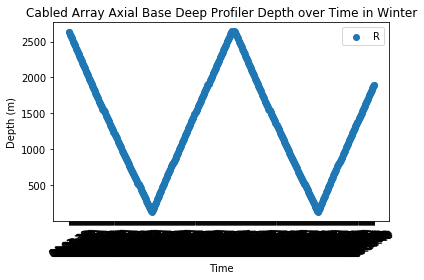

In [28]:
for i in range(len(API_Request)):
    time = []
    temperature = []
    pressure = []
    salinity = []
    r = requests.get(API_Request[i], auth=(USERNAME, TOKEN))
    data = r.json()
    for j in range(len(data)):
        time.append(ntp_seconds_to_datetime(data[j][Title_time[i]]))
        temperature.append(data[j][Title_temperature[i]])
        pressure.append(data[j][Title_pressure[i]])
        salinity.append(data[j][Title_salinity[i]])
    ssp = [0 for x in range(len(temperature))]
    for k in range(len(temperature)):
        ssp[k] = 1449.2+(4.6*temperature[k])-(.055*temperature[k]*temperature[k])+(.00029*temperature[k]*temperature[k]*temperature[k])+((1.34-(0.01*temperature[k]))*(salinity[k]-35))+(0.016*pressure[k])
    poly=np.polyfit(pressure,ssp,7)
    poly_ssp = np.poly1d(poly)(pressure)
    plt.figure()
    plt.scatter(pressure, ssp)
    plt.scatter(pressure,poly_ssp)
    plt.title(SSP_Title[i])
    plt.ylabel('Speed of Sound (m/s)')
    plt.xlabel('Depth (m)')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.gcf().autofmt_xdate()
    plt.legend(('Raw Data','Average'),loc='upper right')
    plt.show()
    plt.scatter(time, pressure)
    plt.title(Depth_Title[i])
    plt.xlabel('Time')
    plt.ylabel('Depth (m)')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.legend(('Raw Data'),loc='upper right')
    plt.show()